In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=35f3622491edb6dd4712444b1c8ae204c1e0a5d647d62668dc01b30aaa2aa188
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns

In [ ]:
#Filtering the warnings

import warnings
warnings.filterwarnings('ignore')

**LOADING THE DATASET**

In [ ]:
wine = pd.read_csv("winequalityN.csv")
print("Wine dataset loaded successfully")

Wine dataset loaded successfully


In [ ]:
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
wine.tail()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
wine.isnull().any

<bound method NDFrame._add_numeric_operations.<locals>.any of        type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     False          False             False        False           False   
1     False          False             False        False           False   
2     False          False             False        False           False   
3     False          False             False        False           False   
4     False          False             False        False           False   
...     ...            ...               ...          ...             ...   
6491  False          False             False        False           False   
6492  False          False             False        False           False   
6494  False          False             False        False           False   
6495  False          False             False        False           False   
6496  False          False             False        False           False   

      chlorid

In [ ]:
wine.type

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [ ]:
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

[]

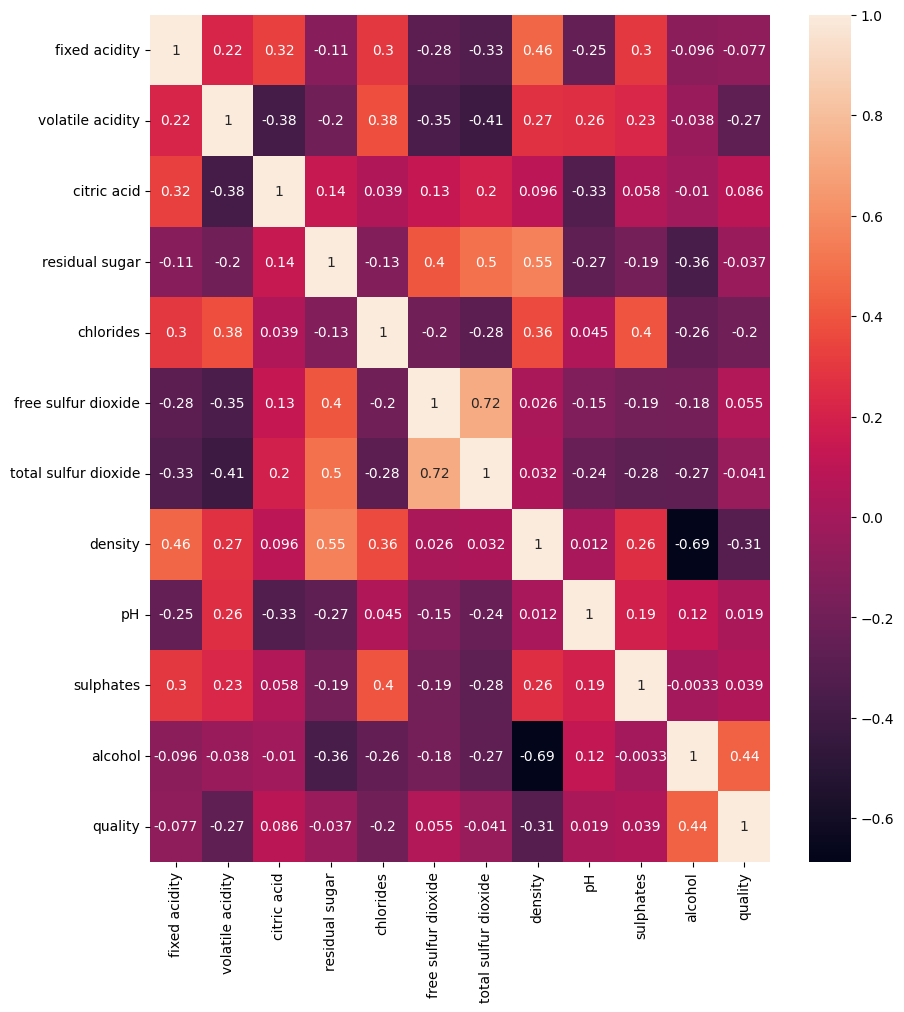

In [ ]:
plt.figure(figsize=(10,11))
sns.heatmap(wine.corr(),annot=True)
plt.plot()

<Axes: xlabel='type', ylabel='residual sugar'>

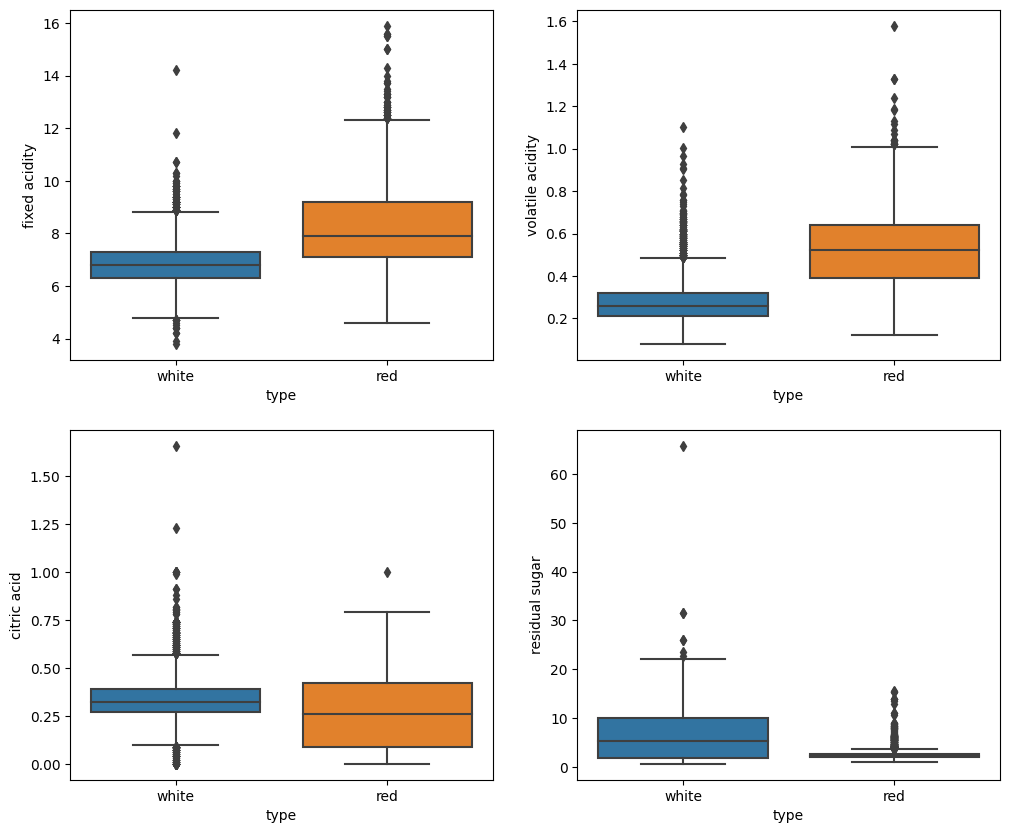

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="type",y="fixed acidity",data=wine)
plt.subplot(2,2,2)
sns.boxplot(x="type",y="volatile acidity",data=wine)
plt.subplot(2,2,3)
sns.boxplot(x="type",y="citric acid",data=wine)
plt.subplot(2,2,4)
sns.boxplot(x="type",y="residual sugar",data=wine)

<Axes: xlabel='type', ylabel='density'>

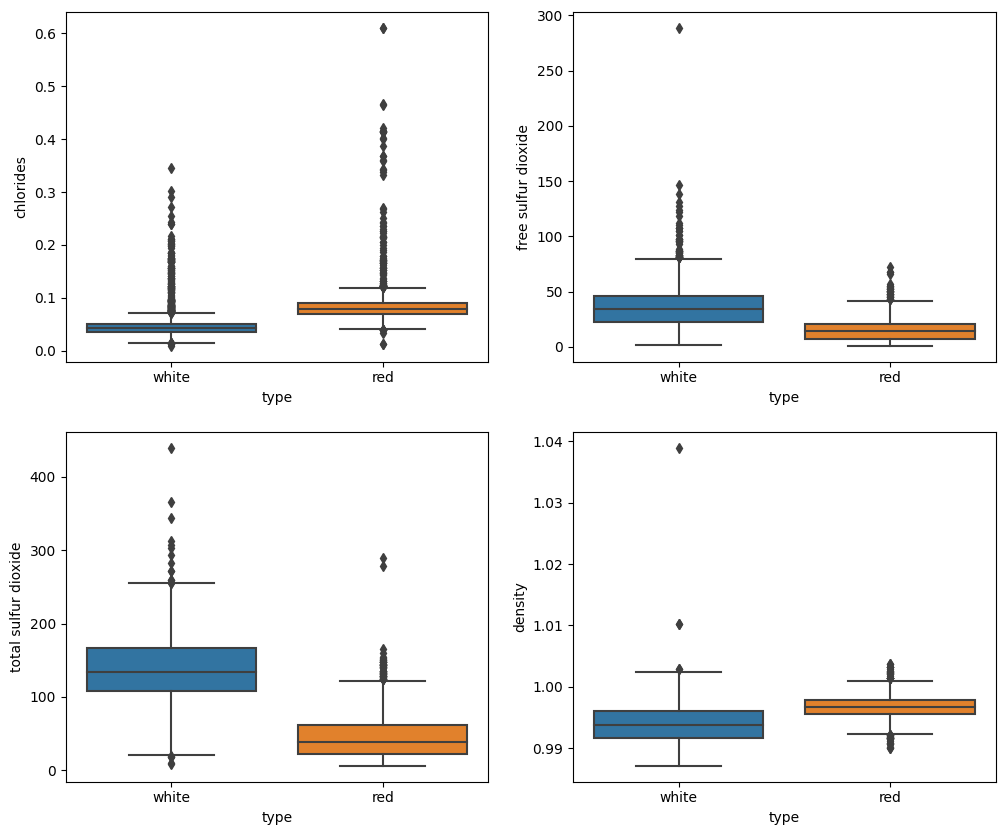

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="type",y="chlorides",data=wine)
plt.subplot(2,2,2)
sns.boxplot(x="type",y="free sulfur dioxide",data=wine)
plt.subplot(2,2,3)
sns.boxplot(x="type",y="total sulfur dioxide",data=wine)
plt.subplot(2,2,4)
sns.boxplot(x="type",y="density",data=wine)

<Axes: xlabel='type', ylabel='quality'>

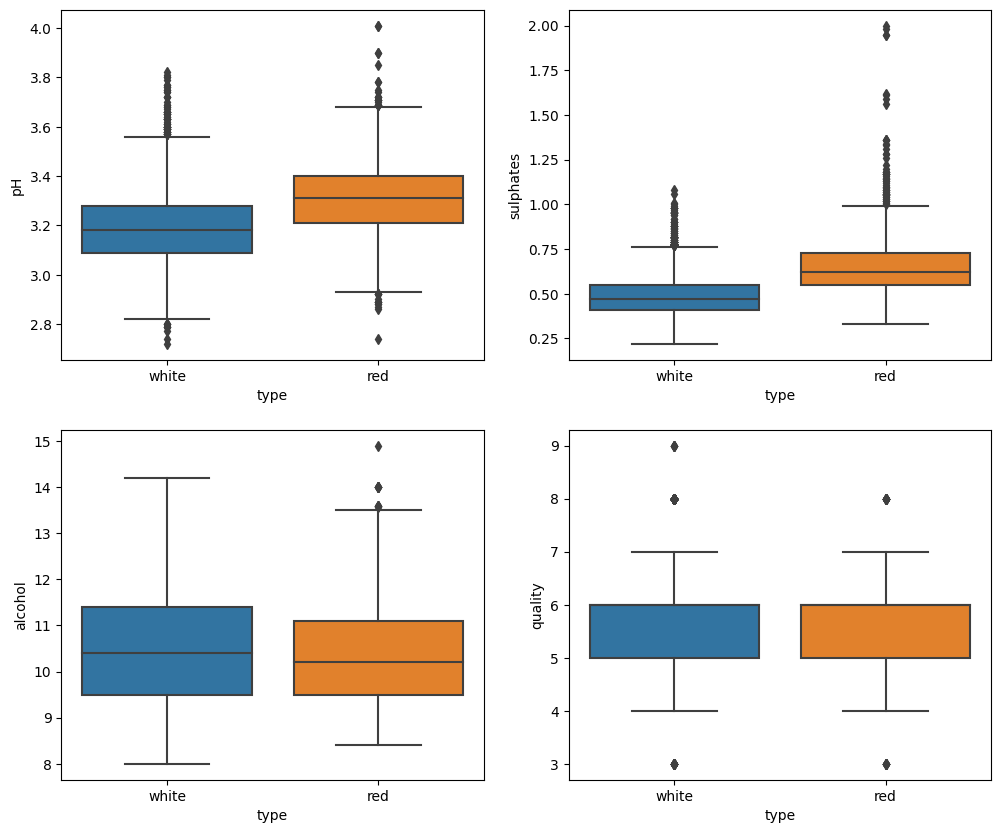

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sns.boxplot(x="type",y="pH",data=wine)
plt.subplot(2,2,2)
sns.boxplot(x="type",y="sulphates",data=wine)
plt.subplot(2,2,3)
sns.boxplot(x="type",y="alcohol",data=wine)
plt.subplot(2,2,4)
sns.boxplot(x="type",y="quality",data=wine)

<Axes: xlabel='quality', ylabel='density'>

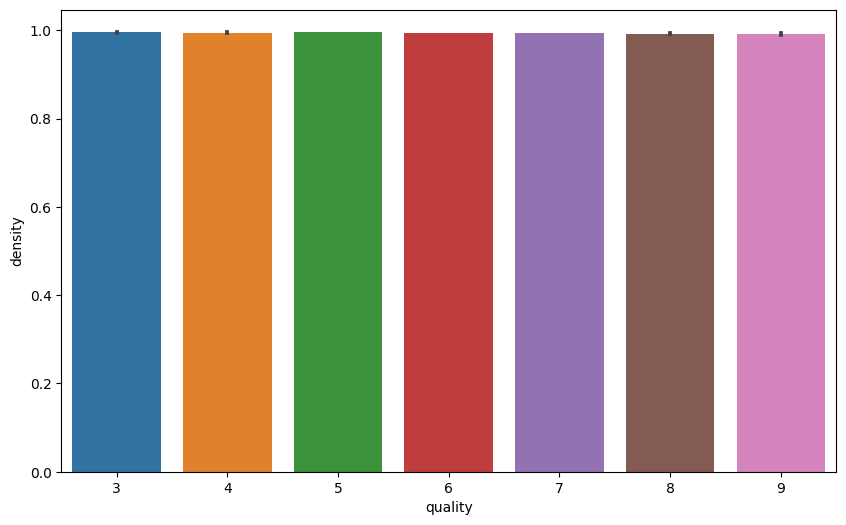

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.barplot(x = 'quality', y = 'density', data = wine)

#Quality and Alcohol
#Quality and sulphate
#quality and total sulfur dioxide
#quality and free sulfur dioxide

**DECISION TREE CLASSIFIER - Using Quality**

In [ ]:
y = wine['quality']
y.head

<bound method NDFrame.head of 0       6
1       6
2       6
3       6
4       6
       ..
6491    6
6492    5
6494    6
6495    5
6496    6
Name: quality, Length: 6463, dtype: int64>

In [ ]:
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [ ]:
wine = wine.drop('type',1)

In [ ]:
wine = wine.drop('quality', 1)

In [ ]:
wine = wine.dropna(axis = 0)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(wine, y, test_size=0.1, random_state=42)

In [ ]:
print(X_train.shape, Y_train.shape)

(5816, 11) (5816,)


In [ ]:
print(X_test.shape, Y_test.shape)

(647, 11) (647,)


In [ ]:
#scikit learn decision tree model training 
DT = tree.DecisionTreeClassifier( )
DT = DT.fit(X_train, Y_train)

In [ ]:
DT.predict(X_test)
prediction = DT.predict(X_test)

In [ ]:
prediction = DT.predict(X_test)
prediction

array([5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5, 5, 7, 5, 4, 4, 6, 5, 6, 5, 6,
       7, 7, 7, 6, 5, 6, 5, 6, 6, 7, 5, 8, 6, 5, 5, 4, 5, 6, 8, 7, 6, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 4, 6, 6, 6, 6, 6, 7, 6, 5, 5, 6,
       4, 7, 6, 5, 6, 7, 7, 7, 7, 7, 6, 7, 5, 6, 8, 5, 6, 5, 6, 7, 6, 6,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 4, 5, 5, 5, 6, 5, 7, 5, 6, 8, 5, 6, 6,
       5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 5, 6, 6, 5, 7, 6, 6, 7, 6, 5, 6, 6,
       7, 9, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 6, 6, 5, 7, 6, 8, 7, 6, 4, 5,
       7, 6, 5, 5, 6, 4, 5, 5, 5, 5, 4, 6, 6, 8, 6, 6, 7, 5, 5, 6, 7, 5,
       5, 5, 5, 5, 6, 6, 8, 6, 7, 6, 5, 5, 7, 5, 7, 5, 6, 6, 4, 5, 7, 5,
       6, 7, 6, 6, 5, 5, 5, 5, 7, 6, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 7, 7,
       6, 5, 5, 6, 7, 8, 9, 6, 6, 5, 7, 6, 6, 6, 5, 6, 6, 5, 8, 3, 6, 8,
       7, 5, 7, 6, 6, 7, 6, 6, 7, 5, 6, 5, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6,
       5, 6, 6, 7, 6, 5, 6, 6, 6, 5, 8, 6, 5, 6, 5, 8, 7, 7, 7, 6, 5, 5,
       7, 8, 5, 4, 7, 6, 5, 5, 5, 5, 6, 5, 6, 6, 7,

In [ ]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           3       1.00      0.33      0.50         3
           4       0.18      0.13      0.15        23
           5       0.65      0.65      0.65       212
           6       0.60      0.63      0.61       275
           7       0.44      0.44      0.44       109
           8       0.40      0.32      0.36        25
           9       0.00      0.00      0.00         0

    accuracy                           0.57       647
   macro avg       0.47      0.36      0.39       647
weighted avg       0.57      0.57      0.57       647



In [ ]:
DT.score(X_test, Y_test)

0.5718701700154559

In [ ]:
#prediction
Y_pred = DT.predict(X_test)

In [ ]:
#Accuracy
from sklearn import metrics
print('Accuracy Score:', metrics.accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.5718701700154559


In [ ]:
confusion_matrix(Y_test,Y_pred)

array([[  1,   1,   0,   0,   1,   0,   0],
       [  0,   3,   8,  12,   0,   0,   0],
       [  0,   9, 138,  54,  10,   1,   0],
       [  0,   4,  49, 172,  44,   6,   0],
       [  0,   0,  15,  40,  48,   5,   1],
       [  0,   0,   1,   8,   7,   8,   1],
       [  0,   0,   0,   0,   0,   0,   0]])

**TYPE 2 - USING "Type"**

In [193]:
wine = pd.read_csv("winequalityN.csv")
print("Wine dataset loaded successfully")

Wine dataset loaded successfully


In [194]:
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [195]:
wine['type'].replace(['white','red'],
                     [0, 1], inplace=True)

In [196]:
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [197]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [198]:
wine = wine.dropna(axis = 0)

In [199]:
y = wine['type']
y.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
6491    1
6492    1
6494    1
6495    1
6496    1
Name: type, Length: 6463, dtype: int64>

In [200]:
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     0            7.0              0.27         0.36            20.7   
1     0            6.3              0.30         0.34             1.6   
2     0            8.1              0.28         0.40             6.9   
3     0            7.2              0.23         0.32             8.5   
4     0            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [201]:
wine = wine.drop('quality', 1)
wine = wine.drop('type', 1)

In [202]:
wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [203]:
X_train, X_test, Y_train, Y_test = train_test_split(wine, y, test_size=0.1, random_state=42)

In [224]:
#scikit learn decision tree model training 
Dtree = DecisionTreeClassifier()
Dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [225]:
Dtree.predict(X_test)
prediction = Dtree.predict(X_test)

In [226]:
prediction = Dtree.predict(X_test)
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,

In [227]:
# evaluation for multi class classification
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       480
           1       0.99      0.96      0.98       167

    accuracy                           0.99       647
   macro avg       0.99      0.98      0.98       647
weighted avg       0.99      0.99      0.99       647



**Visualization**

In [ ]:
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)  #max_depth = 3
dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

**print text representation of the tree with sklearn.tree.export_text method**

In [254]:
text_representation = tree.export_text(dt)
print(text_representation)

|--- feature_4 <= 0.06
|   |--- feature_6 <= 49.50
|   |   |--- feature_4 <= 0.04
|   |   |   |--- class: 0
|   |   |--- feature_4 >  0.04
|   |   |   |--- class: 1
|   |--- feature_6 >  49.50
|   |   |--- feature_1 <= 0.82
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.82
|   |   |   |--- class: 1
|--- feature_4 >  0.06
|   |--- feature_6 <= 113.50
|   |   |--- feature_7 <= 0.99
|   |   |   |--- class: 0
|   |   |--- feature_7 >  0.99
|   |   |   |--- class: 1
|   |--- feature_6 >  113.50
|   |   |--- feature_0 <= 7.75
|   |   |   |--- class: 0
|   |   |--- feature_0 >  7.75
|   |   |   |--- class: 1



**Plot Tree with plot_tree**

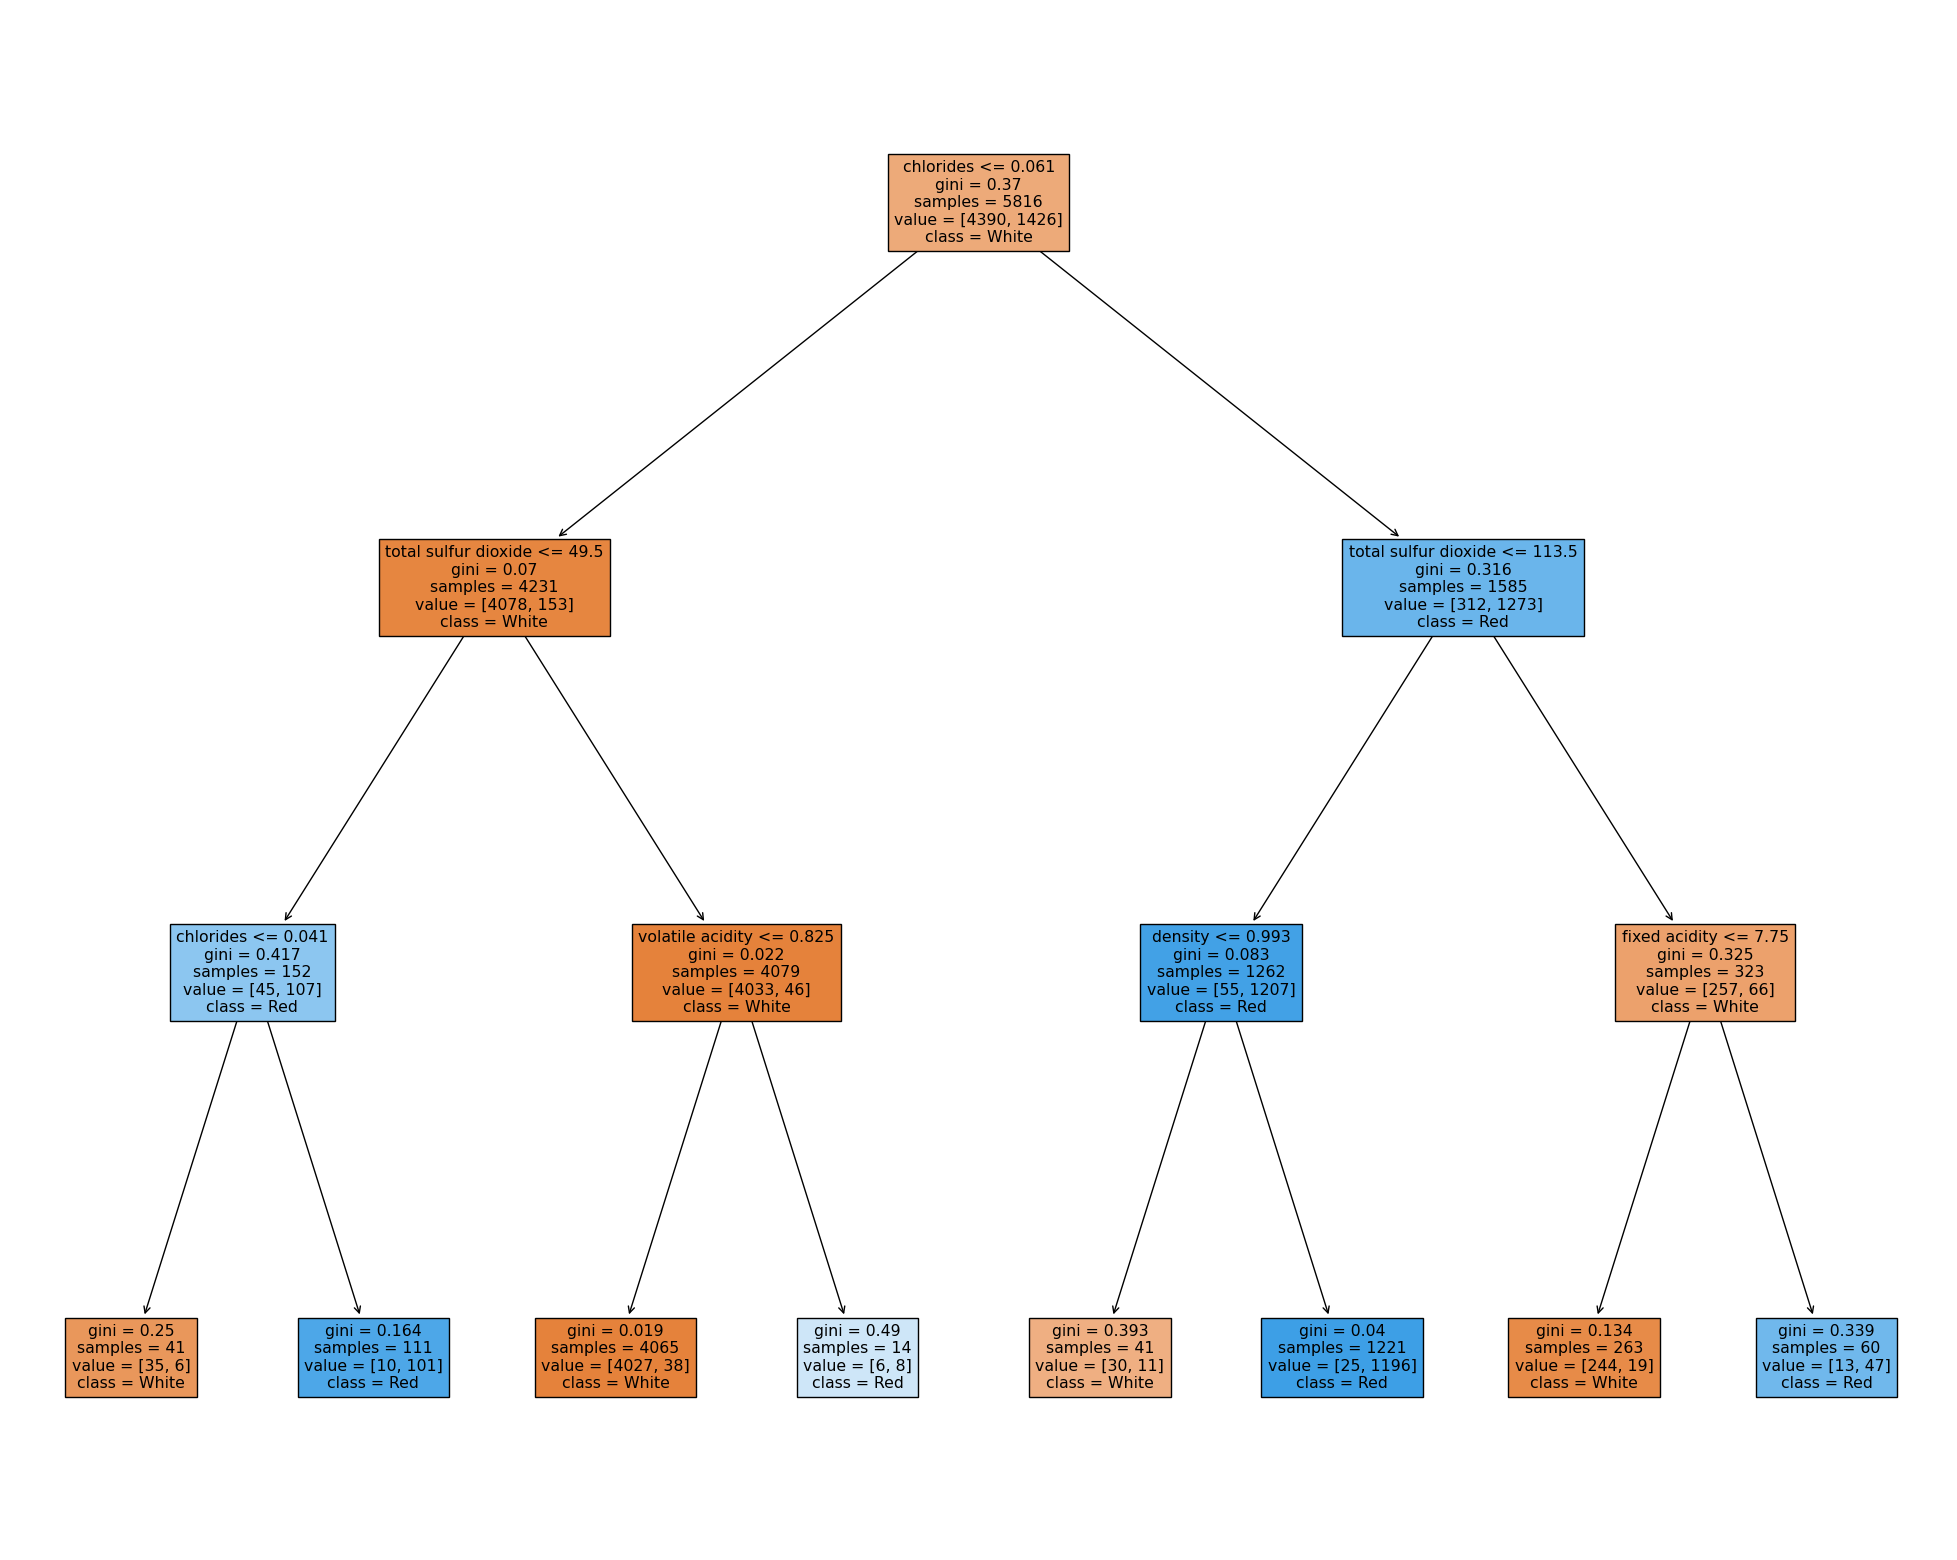

In [255]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=wine.columns,
                   class_names=['White', "Red"],
                   filled=True)

**Plot Decision Tree with graphviz**

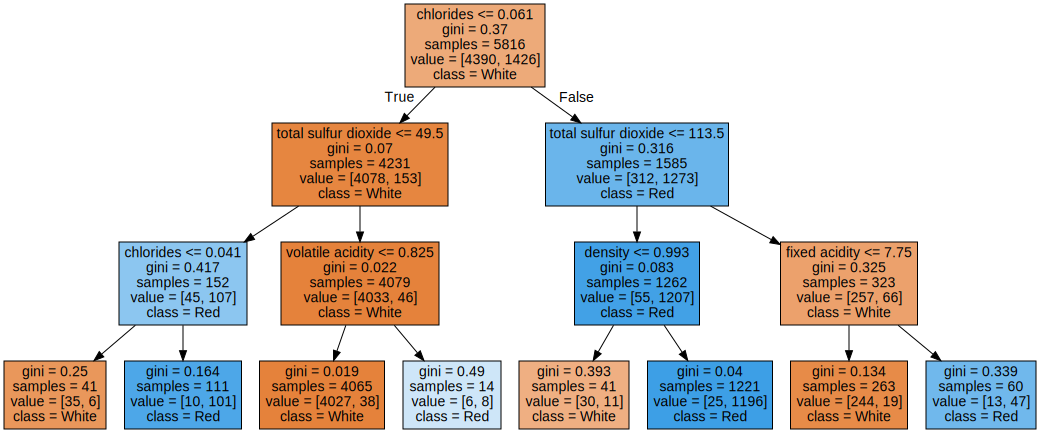

In [256]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dt, out_file=None, 
                                feature_names=wine.columns, 
                                class_names=['White', "Red"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [257]:
#to save
graph.render("output_DecisionTree/iris_DecisionTree_graphivz1")

'output_DecisionTree/iris_DecisionTree_graphivz1.png'

**WITH STRINGIO**

Import Successful


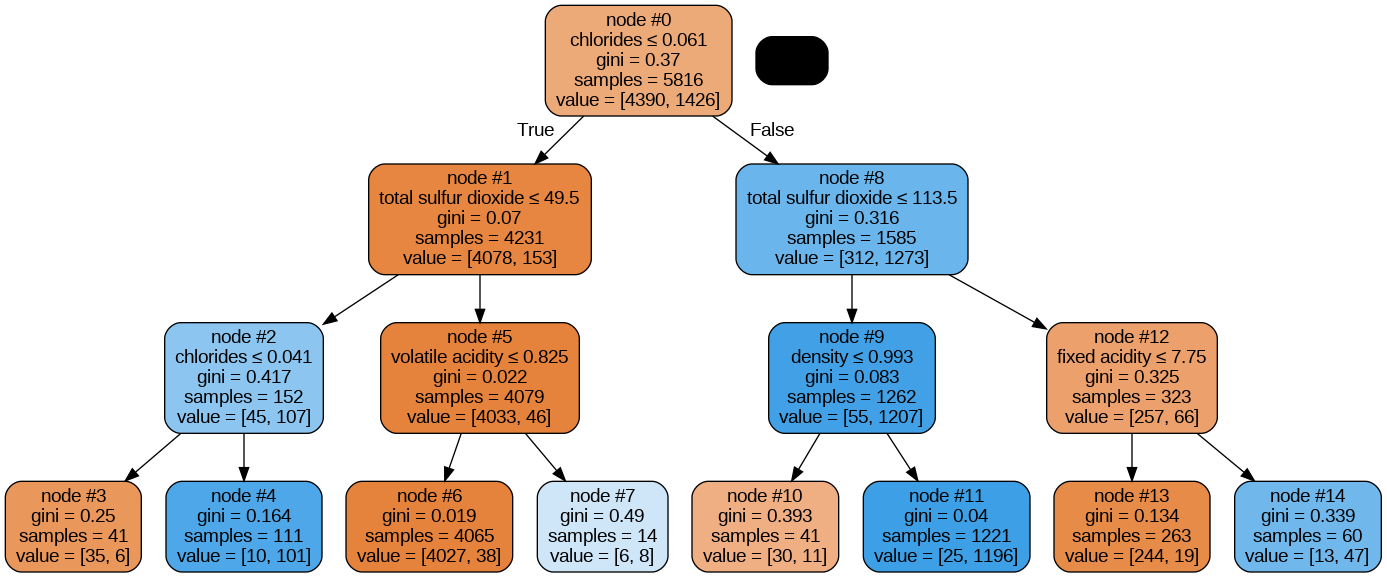

In [258]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
print("Import Successful")

# Visualizing Decision Tree

dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, 
                feature_names = wine.columns,
                filled = True, rounded = True, 
                special_characters = True, node_ids = True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

# Generate .png image of "Decision Tree"
Image(graph.create_png())

**plot with dtreeviz package (dtreeviz and graphviz needed)**

In [259]:
pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 3.9 MB/s eta 0:00:00


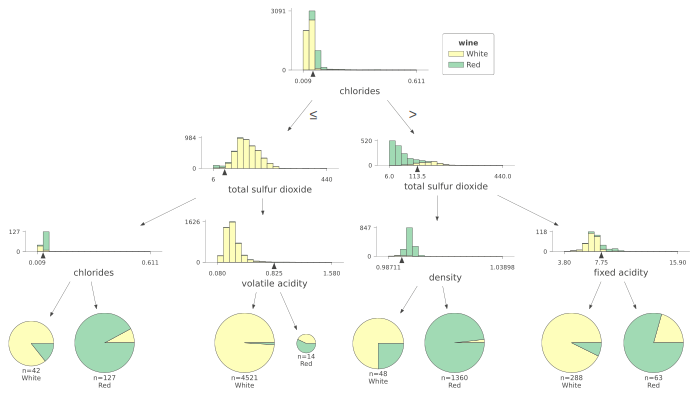

In [276]:
import dtreeviz

viz = dtreeviz.model(dt, wine, y,
                target_name='wine',
                feature_names= wine.columns,
                class_names=['White', "Red"])

viz.view()  

** Visualizing the Decision Tree in Regression Task**

In [277]:

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [278]:
# Fit the regressor, set max_depth = 3
regr = DecisionTreeRegressor(max_depth=3, random_state=1234)
model = regr.fit(X_train, Y_train)

In [279]:
text_representation = tree.export_text(regr)
print(text_representation)

|--- feature_4 <= 0.06
|   |--- feature_6 <= 49.50
|   |   |--- feature_4 <= 0.04
|   |   |   |--- value: [0.15]
|   |   |--- feature_4 >  0.04
|   |   |   |--- value: [0.91]
|   |--- feature_6 >  49.50
|   |   |--- feature_1 <= 0.82
|   |   |   |--- value: [0.01]
|   |   |--- feature_1 >  0.82
|   |   |   |--- value: [0.57]
|--- feature_4 >  0.06
|   |--- feature_6 <= 113.50
|   |   |--- feature_7 <= 0.99
|   |   |   |--- value: [0.27]
|   |   |--- feature_7 >  0.99
|   |   |   |--- value: [0.98]
|   |--- feature_6 >  113.50
|   |   |--- feature_0 <= 7.75
|   |   |   |--- value: [0.07]
|   |   |--- feature_0 >  7.75
|   |   |   |--- value: [0.78]



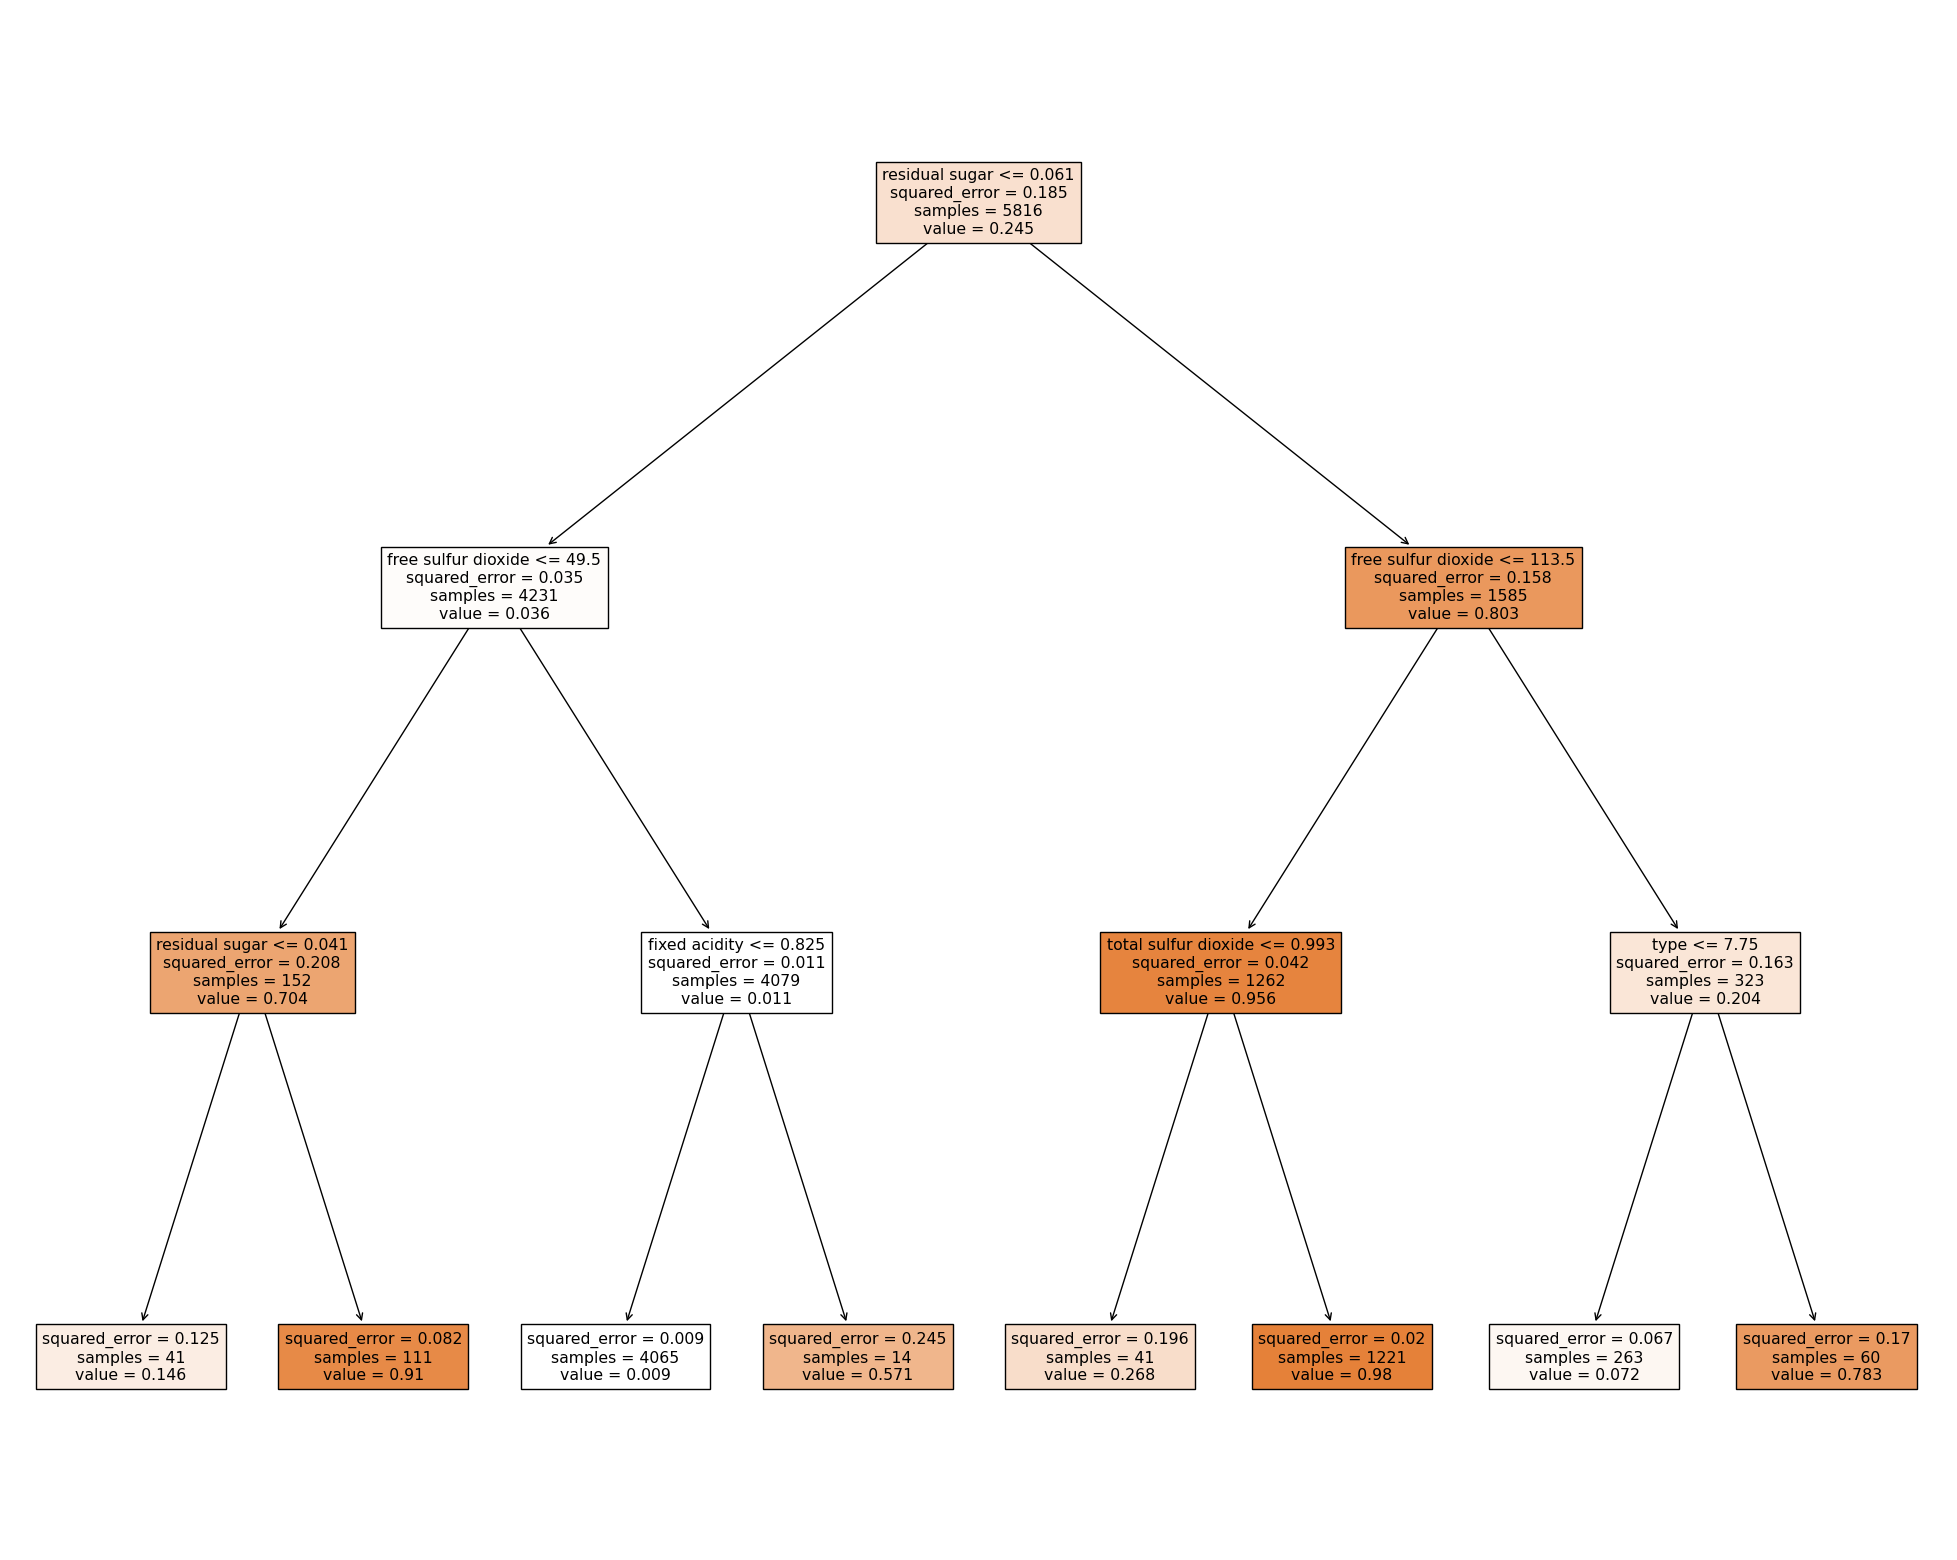

In [280]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regr, feature_names=fn, filled=True)

In [282]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=wine.columns, 
                                class_names=['White', "Red"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [284]:
import dtreeviz

viz = dtreeviz.model(regr, wine, y,
                target_name='wine',
                feature_names= wine.columns,
                class_names=['White', "Red"])

viz.view()  